In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:

import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding3D , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Input


In [5]:
batch_size = 16
img_height = 200
img_width = 200 
NUM_CLASSES = 6

In [6]:
import pathlib
data_dir = r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\Data_aug"
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

280


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.7,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical')

Found 8316 files belonging to 6 classes.
Using 2495 files for training.
Found 8316 files belonging to 6 classes.
Using 2494 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Bungarus', 'Calloselasma', 'Daboia_russelii', 'Naja', 'Ophiophagus', 'Trimeresurus']


In [10]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(6):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
    


In [11]:
model = Sequential()


model_name = "InceptionResNetV2"

pretrained_model= tf.keras.applications.InceptionResNetV2(include_top=False,
                    input_shape=(img_height,img_width,3),
                    pooling='avg',classes=NUM_CLASSES,
                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
        


model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

219070464/219055592 [==============================] - 12s 0us/step


In [12]:
pretrained_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                

 batch_normalization_10 (BatchN  (None, 22, 22, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 22, 22, 64)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 22, 22, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 22, 22, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 batch_normalization_19 (BatchN  (None, 22, 22, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 22, 22, 48)  144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 22, 22, 32)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 22, 22, 48)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_18

                                                                                                  
 block35_3_mixed (Concatenate)  (None, 22, 22, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 22, 22, 320)  41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 22, 22, 320)  0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3

                                                                                                  
 activation_40 (Activation)     (None, 22, 22, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 22, 22, 32)   10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 22, 22, 32)   9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 22, 22, 64)   27648       ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_36 (BatchN  (None, 22, 22, 32)  96          ['conv2d_36[0][0]']              
 ormalizat

 block35_6 (Lambda)             (None, 22, 22, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 22, 22, 320)  0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 22, 22, 32)   10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 22, 22, 32)  96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_59 (Conv2D)             (None, 22, 22, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 22, 22, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 22, 22, 32)  96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 22, 22, 64)  192         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_69 (BatchN  (None, 22, 22, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 22, 22, 32)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 22, 22, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 22, 22, 48)   13824       ['activation_69[0][0]']          
                                                                                                  
 batch_normalization_67 (BatchN  (None, 22, 22, 32)  96          ['conv2d_67[0][0]']              
 ormalizat

                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 10, 10, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 10, 10, 128)  384        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 10, 10, 128)  0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 10, 10, 160)  143360      ['activation_77[0][0]']          
          

                                                                                                  
 batch_normalization_85 (BatchN  (None, 10, 10, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 10, 10, 128)  0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 10, 10, 160)  143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 10, 10, 160)  480        ['conv2d_86[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 activation_93 (Activation)     (None, 10, 10, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94 (Conv2D)             (None, 10, 10, 160)  143360      ['activation_93[0][0]']          
                                                                                                  
 batch_normalization_94 (BatchN  (None, 10, 10, 160)  480        ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 10, 10, 160)  0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 conv2d_92

 conv2d_102 (Conv2D)            (None, 10, 10, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 10, 10, 160)  480        ['conv2d_102[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_102 (Activation)    (None, 10, 10, 160)  0           ['batch_normalization_102[0][0]']
                                                                                                  
 conv2d_100 (Conv2D)            (None, 10, 10, 192)  208896      ['block17_6_ac[0][0]']           
                                                                                                  
 conv2d_103 (Conv2D)            (None, 10, 10, 192)  215040      ['activation_102[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 10, 10, 160)  0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_108 (Conv2D)            (None, 10, 10, 192)  208896      ['block17_8_ac[0][0]']           
                                                                                                  
 conv2d_111 (Conv2D)            (None, 10, 10, 192)  215040      ['activation_110[0][0]']         
                                                                                                  
 batch_normalization_108 (Batch  (None, 10, 10, 192)  576        ['conv2d_108[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_116 (Conv2D)            (None, 10, 10, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_119 (Conv2D)            (None, 10, 10, 192)  215040      ['activation_118[0][0]']         
                                                                                                  
 batch_normalization_116 (Batch  (None, 10, 10, 192)  576        ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_119 (Batch  (None, 10, 10, 192)  576        ['conv2d_119[0][0]']             
 Normalization)                                                                                   
          

 conv2d_127 (Conv2D)            (None, 10, 10, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 10, 10, 192)  576        ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_127 (Batch  (None, 10, 10, 192)  576        ['conv2d_127[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_124 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_124[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 10, 10, 192)  576        ['conv2d_135[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_132 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_132[0][0]']
                                                                                                  
 activation_135 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_135[0][0]']
                                                                                                  
 block17_15_mixed (Concatenate)  (None, 10, 10, 384)  0          ['activation_132[0][0]',         
          

 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 activation_143 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_143[0][0]']
                                                                                                  
 block17_17_mixed (Concatenate)  (None, 10, 10, 384)  0          ['activation_140[0][0]',         
                                                                  'activation_143[0][0]']         
                                                                                                  
 block17_17_conv (Conv2D)       (None, 10, 10, 1088  418880      ['block17_17_mixed[0][0]']       
          

                                                                                                  
 activation_151 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 10, 10, 384)  0          ['activation_148[0][0]',         
                                                                  'activation_151[0][0]']         
                                                                                                  
 block17_19_conv (Conv2D)       (None, 10, 10, 1088  418880      ['block17_19_mixed[0][0]']       
                                )                                                                 
                                                                                                  
 block17_19 (Lambda)            (None, 10, 10, 1088  0           ['block17_18_ac[0][0]',          
          

 conv2d_157 (Conv2D)            (None, 4, 4, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 4, 4, 288)    663552      ['activation_158[0][0]']         
                                                                                                  
 conv2d_162 (Conv2D)            (None, 4, 4, 320)    829440      ['activation_161[0][0]']         
                                                                                                  
 batch_normalization_157 (Batch  (None, 4, 4, 384)   1152        ['conv2d_157[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_159 (Batch  (None, 4, 4, 288)   864         ['conv2d_159[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_167 (Batch  (None, 4, 4, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_170 (Batch  (None, 4, 4, 256)   768         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_167 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_167[0][0]']
                                                                                                  
 activation_170 (Activation)    (None, 4, 4, 256)    0           ['batch_normalization_170[0][0]']
          

 activation_175 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 4, 4, 256)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 block8_4_mixed (Concatenate)   (None, 4, 4, 448)    0           ['activation_175[0][0]',         
                                                                  'activation_178[0][0]']         
                                                                                                  
 block8_4_conv (Conv2D)         (None, 4, 4, 2080)   933920      ['block8_4_mixed[0][0]']         
                                                                                                  
 block8_4 (Lambda)              (None, 4, 4, 2080)   0           ['block8_3_ac[0][0]',            
          

 block8_6_conv (Conv2D)         (None, 4, 4, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 4, 4, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
                                                                                                  
 block8_6_ac (Activation)       (None, 4, 4, 2080)   0           ['block8_6[0][0]']               
                                                                                                  
 conv2d_188 (Conv2D)            (None, 4, 4, 192)    399360      ['block8_6_ac[0][0]']            
                                                                                                  
 batch_normalization_188 (Batch  (None, 4, 4, 192)   576         ['conv2d_188[0][0]']             
 Normaliza

 conv2d_196 (Conv2D)            (None, 4, 4, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 4, 4, 192)   576         ['conv2d_196[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_196 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_196[0][0]']
                                                                                                  
 conv2d_197 (Conv2D)            (None, 4, 4, 224)    129024      ['activation_196[0][0]']         
                                                                                                  
 batch_normalization_197 (Batch  (None, 4, 4, 224)   672         ['conv2d_197[0][0]']             
 Normaliza

                                                                                                  
Total params: 54,336,736
Trainable params: 0
Non-trainable params: 54,336,736
__________________________________________________________________________________________________


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 55,126,758
Trainable params: 790,022
Non-trainable params: 54,336,736
_________________________________________________________________


In [14]:
from tensorflow.keras.optimizers import Adam

learningRate = 0.00001
loss_function = "categorical_crossentropy"
model.compile(optimizer=Adam(learning_rate=learningRate),
               loss=loss_function,
               metrics=['accuracy'])

################################################
nb_epochs=50
################################################


In [15]:
# #  Train  with backup h5 every epoch. #####################


# checkpoint_path = r"./ModelSaving/{epoch:04d}.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, verbose=1, save_weights_only=False,
#     # Save weights, every epoch.
#     save_freq='epoch'
# )
# resnet_model.save(checkpoint_path.format(epoch=0))
# vg = validation_generator
# history = resnet_model.fit( train_generator, validation_data=vg ,epochs=nb_epochs, callbacks = [cp_callback])

In [16]:
history = model.fit( train_ds, validation_data=val_ds ,epochs=nb_epochs )

Epoch 1/50
156/156 [==============================] - 132s 603ms/step - loss: 68.1517 - accuracy: 0.1808 - val_loss: 27.3226 - val_accuracy: 0.1881
Epoch 2/50
156/156 [==============================] - 85s 546ms/step - loss: 21.3195 - accuracy: 0.2088 - val_loss: 22.4507 - val_accuracy: 0.1945
Epoch 3/50
156/156 [==============================] - 71s 459ms/step - loss: 18.4824 - accuracy: 0.2265 - val_loss: 18.0193 - val_accuracy: 0.1856
Epoch 4/50
156/156 [==============================] - 18s 118ms/step - loss: 15.9881 - accuracy: 0.2317 - val_loss: 18.3133 - val_accuracy: 0.2049
Epoch 5/50
156/156 [==============================] - 18s 118ms/step - loss: 16.4395 - accuracy: 0.2188 - val_loss: 14.9399 - val_accuracy: 0.2157
Epoch 6/50
156/156 [==============================] - 18s 117ms/step - loss: 14.2271 - accuracy: 0.2277 - val_loss: 19.3311 - val_accuracy: 0.1852
Epoch 7/50
156/156 [==============================] - 18s 116ms/step - loss: 14.1027 - accuracy: 0.2285 - val_loss: 1

Model = InceptionResNetV2
Epochs = 50
Image Size = 200
Batch = 16
learningRate = 1e-05


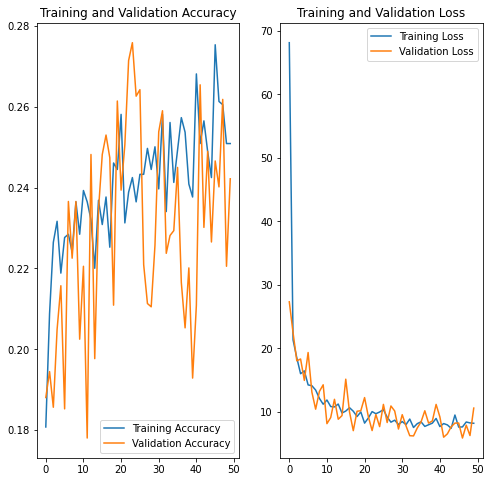

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

print("Model = "+model_name)
print("Epochs = {}".format(nb_epochs))
print("Image Size = {}".format(img_width))
print("Batch = {}".format(batch_size))
print("learningRate = {}".format(learningRate))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#####  use this  to save train graph as png #####################
from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d-%m-%Y_%H-%M")
graph_path = r'./experimentData/graph'
if( not (os.path.exists(graph_path)) ) :
    os.mkdir(graph_path)
plt.savefig(graph_path+'/'+str_date_time+".png")  
#####  use this  to save train graph as png #####################

plt.show()


graph_path = graph_path+'/'+str_date_time+".png"


In [18]:
model.save(r"./ModelSaving/FinalModel_"+model_name+".h5")

In [19]:
import pandas as pd
import os

from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d/%m/%Y, %H:%M")



############################# List that var should be defined   
############################# รายชื่อตัวแปร ที่ควรสร้าง และใส่ค่า 
varList = {"model_name",   ### name of model
           "nb_epochs",     ### number of epochs
           "batch_size",    ###  batch size
           "learningRate",  ### learning rate
           "accuracy",       ###  accuracy of model
           "val_accuracy",  ### val_accuracy  of model
           "loss",          ### loss  of model
           "val_loss",      ### val_loss  of model
           "loss_function", ### lossfunction name    Must be str
           "graph_path",    ###  path to graph dir
           "exp_dataset",  ###  explain about dataset
           "other_comment"}  ###  option  for comment
#############################





pathDir = r'./experimentData'
path = r'./experimentData/Experiment.csv'

ExpDict = {
            'Date': [],
            'ModelName': [],
            'Epochs' : [],
            'ImageSize' : [],
            'Batch': [],
            'LearningRate' : [],
            'Accuracy' : [],
            'valAccuracy': [],
            'loss' : [],
            'valLoss' : [],
            'lossFunction' : [],
            'GraphPath' : [],
            'ExpDataSet' : [],
            'otherComment' : []
             }

if(not (os.path.exists(path))) :
    dt = pd.DataFrame(ExpDict)
    if( not (os.path.exists(pathDir)) ) :
            os.mkdir(pathDir)
    dt.to_csv(path,na_rep='',float_format='%.2f',index=False)

expExel = pd.read_csv(path)

for var in varList :
    if not(var in globals()):
        exec(var + " = ''")

        
ExpDict["Date"] = str_date_time
ExpDict["ModelName"] = model_name
ExpDict["Epochs"] = str(nb_epochs)
if ("img_height" in globals()) and  ("img_width" in globals()):
    ExpDict["ImageSize"] = str("HeightWidth = {}*{}".format(img_height,img_width))
elif ("img_size" in globals()):
    ExpDict["ImageSize"] = str("ImageSize = {}".format(img_size))
else :
    ExpDict["ImageSize"] = ""
ExpDict["Batch"] = str(batch_size)
ExpDict["LearningRate"] = str(learningRate)
ExpDict["Accuracy"] = str(acc)
ExpDict["valAccuracy"] = str(val_acc)
ExpDict["loss"] = str(loss)
ExpDict["valLoss"] = str(val_loss)
ExpDict["lossFunction"] = loss_function
ExpDict["GraphPath"] = graph_path
ExpDict["ExpDataSet"] = exp_dataset
ExpDict["otherComment"] = other_comment





In [20]:
###  บันทึกทับลง exel
expExel = expExel.append(ExpDict,ignore_index=True)
expExel.to_csv(path,na_rep='',float_format='%.2f',index=False)

C:\Users\kuric\AppData\Local\Temp\ipykernel_15904\2187488631.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expExel = expExel.append(ExpDict,ignore_index=True)
